In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib widget
from len import finite_len_ab, infinite_len_ab, inv_bool_conv

In [34]:
NPTS = 100
n0 = 128
p = 0
q = np.linspace(1/4, 1/2, NPTS)
r = np.linspace(0, 1/2, NPTS)

In [35]:
alpha_min = np.zeros((NPTS, NPTS))
l_min = np.zeros((NPTS, NPTS))
s_min = np.zeros((NPTS, NPTS))
inifiniteapprox = infinite_len_ab()

Initialised the infinite length class


In [36]:
def constraints

SyntaxError: invalid syntax (579086745.py, line 1)

# Not Doing constrained optimization

In [37]:

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
print('Note: Check if warnings about invalid divides have been turned off or not!')
for i, rr in enumerate(r):
    for j, qq in enumerate(q):
        fixed_args = (qq, n0, p, rr)
        def func_apply(x, qq, n0, p, r):
            return inifiniteapprox.len(*fixed_args, *x)
        x_0 = np.array((1/4, 1/4))
        res = minimize(func_apply, x0=x_0, args= fixed_args, bounds = [(0.001, 0.5), (0.001, 0.5)])
        if res.success:
            alpha_min[i, j] = res.x[1]
            s_min[i, j] = res.x[0]



Note: Check if warnings about invalid divides have been turned off or not!


In [38]:
warnings.filterwarnings("default")
R, Q = np.meshgrid(q, r)
for i, rr in enumerate(r):
    for j, qq in enumerate(q):
        l_min[i,j] = inifiniteapprox.len(qq, n0, p, rr, s_min[i,j], alpha_min[i,j])



/Users/himanshusingh/Rotation/Rotation-3/code/len.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.where(np.logical_or(a==0, a==1), 0, a*np.log2(1/a) + (1-a)*np.log2(1/(1-a)) )
/Users/himanshusingh/Rotation/Rotation-3/code/len.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.where(np.logical_or(a==0, a==1), 0, a*np.log2(1/a) + (1-a)*np.log2(1/(1-a)) )


Text(0.5, 1.0, '$s_{min}$')

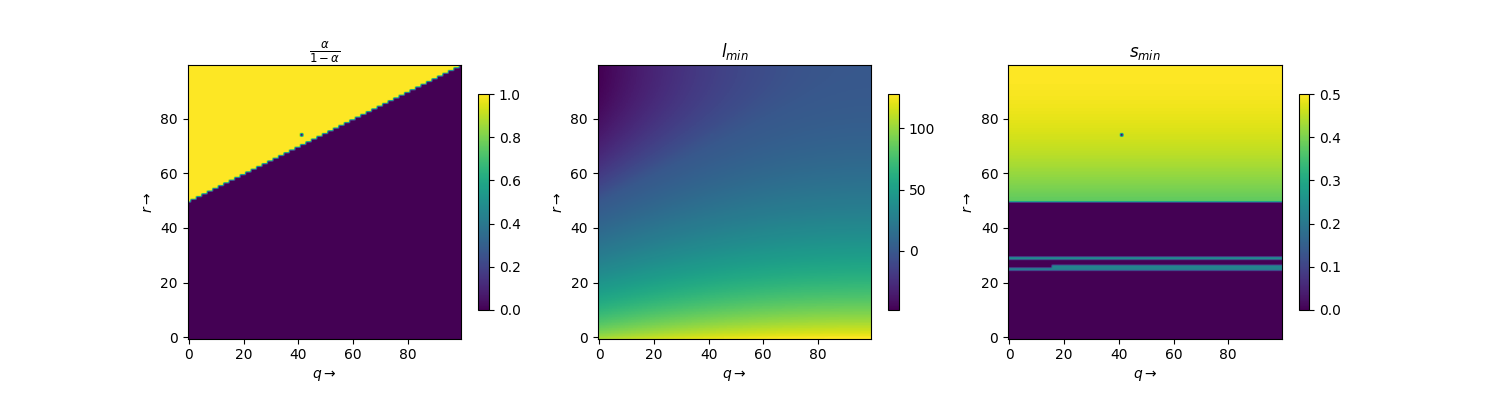

In [42]:
plt.clf()
fig, ax  =plt.subplots( 1,3, figsize = (15,4))
MAP = ax[0].imshow((alpha_min/(1-alpha_min)), origin = 'lower')
plt.colorbar(mappable=MAP, ax = ax[0], shrink = 0.7)
ax[0].set_xlabel(r'$q\to$')
ax[0].set_ylabel(r'$r\to$')
ax[0].set_title(r'$\frac{\alpha}{1-\alpha}$')


MAP = ax[1].imshow(l_min, origin = 'lower')
plt.colorbar(mappable=MAP, ax = ax[1], shrink = 0.7)
ax[1].set_xlabel(r'$q\to$')
ax[1].set_ylabel(r'$r\to$')
ax[1].set_title(r'$l_{min}$')


MAP = ax[2].imshow(s_min, origin = 'lower')
plt.colorbar(mappable=MAP, ax = ax[2], shrink = 0.7)
ax[2].set_xlabel(r'$q\to$')
ax[2].set_ylabel(r'$r\to$')
ax[2].set_title(r'$s_{min}$')

In [40]:
inds = np.isnan(alpha_min)
alpha_min[inds]


array([], dtype=float64)

## Fixing alpha

In [24]:
alpha = 0.5
for i, rr in enumerate(r):
    for j, qq in enumerate(q):
        fixed_args = (qq, n0, p, rr, alpha)
        def func_apply(x, qq, n0, p, r, alpha):
            return inifiniteapprox.len(*fixed_args[:-1],x, alpha=alpha)
        x_0 = np.array((1/4,))
        res = minimize(func_apply, x0=x_0, args= fixed_args, bounds = [(0.001, 0.5)])
        if res.success:
            # alpha_min[i, j] = res.x[1]
            s_min[i, j] = res.x[0]

/Users/himanshusingh/Rotation/Rotation-3/code/len.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.where(np.logical_or(a==0, a==1), 0, a*np.log2(1/a) + (1-a)*np.log2(1/(1-a)) )
/Users/himanshusingh/Rotation/Rotation-3/code/len.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.where(np.logical_or(a==0, a==1), 0, a*np.log2(1/a) + (1-a)*np.log2(1/(1-a)) )
/Users/himanshusingh/Rotation/Rotation-3/code/len.py:17: RuntimeWarning: invalid value encountered in log2
  return -np.sum(p[inds]*np.log2(p[inds]))


In [25]:
l_min = np.zeros((NPTS, NPTS))
for i, rr in enumerate(r):
    for j, qq in enumerate(q):
        l_min[i,j] = inifiniteapprox.len(qq, n0, p, rr, s_min[i,j], alpha)

/Users/himanshusingh/Rotation/Rotation-3/code/len.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.where(np.logical_or(a==0, a==1), 0, a*np.log2(1/a) + (1-a)*np.log2(1/(1-a)) )
/Users/himanshusingh/Rotation/Rotation-3/code/len.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.where(np.logical_or(a==0, a==1), 0, a*np.log2(1/a) + (1-a)*np.log2(1/(1-a)) )


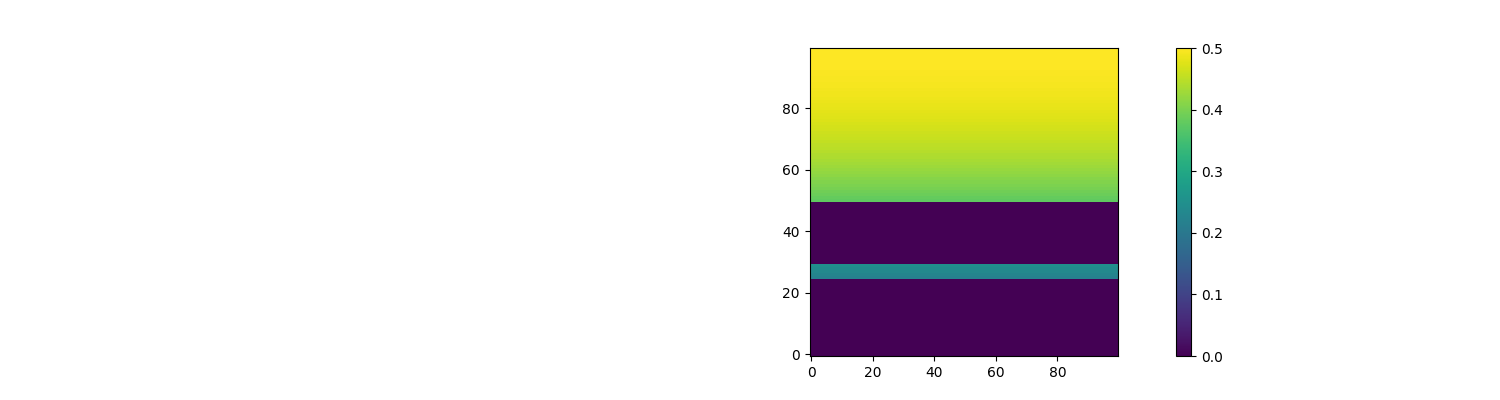

In [32]:
plt.clf()
plt.imshow(s_min, origin='lower')
plt.colorbar()
plt.show()

In [31]:
s_min

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49979593, 0.49979593, 0.49979593, ..., 0.49979593, 0.49979593,
        0.49979593],
       [0.49994898, 0.49994898, 0.49994898, ..., 0.49994898, 0.49994898,
        0.49994898],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ]])

In [ ]:
for 